In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [102]:
df = pd.read_csv("dataset.csv")
df.head(5)

,Serial No.,Degree,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,B.Sc,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2,B.Sc,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3,B.Sc,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4,B.Sc,322.0,110.0,3.0,3.5,2.5,8.67,NaN,0.80
4,5,B.Sc,314.0,103.0,2.0,2.0,3.0,8.21,0.0,NaN


In [103]:
df['degree_new'] = df['Degree'].map({'B.Sc': 1, 'M.Sc': 0})
print(df['degree_new'].value_counts())

degree_new
1.0    224
0.0    175
Name: count, dtype: int64


In [104]:
df.drop('Degree', axis=1, inplace=True)
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,degree_new
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92,1.0
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76,1.0
2,3,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72,1.0
3,4,322.0,110.0,3.0,3.5,2.5,8.67,NaN,0.80,1.0
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0.0,NaN,1.0
5,6,330.0,115.0,5.0,4.5,NaN,NaN,1.0,0.90,1.0
6,7,321.0,109.0,NaN,NaN,4.0,NaN,1.0,0.75,1.0
7,8,308.0,101.0,2.0,3.0,4.0,7.90,0.0,0.68,1.0
8,9,NaN,102.0,1.0,2.0,NaN,8.00,NaN,0.50,1.0
9,10,323.0,108.0,NaN,3.5,NaN,NaN,0.0,0.45,1.0


In [105]:
print(df.columns.tolist())


['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit', 'degree_new']


In [106]:
df.drop('Serial No.', axis=1, inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,degree_new
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92,1.0
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76,1.0
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72,1.0
3,322.0,110.0,3.0,3.5,2.5,8.67,NaN,0.80,1.0
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,NaN,1.0


In [107]:
gre_mean = df['GRE Score'].mean()
toefl_mean = df['TOEFL Score'].mean()


In [108]:
df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].mean())
df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].mean())
df['Chance of Admit'] = df['Chance of Admit'].fillna(df['Chance of Admit'].mean())
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mean())
df['SOP'] = df['SOP'].fillna(df['SOP'].mean())
df['LOR'] = df['LOR'].fillna(df['LOR'].mean())
df['CGPA'] = df['CGPA'].fillna(df['CGPA'].mean())
df.loc[df['Research'].isna(), 'Research'] = np.random.randint(0, 2, size=df['Research'].isna().sum())
df['degree_new'] = df['degree_new'].fillna(df['degree_new'].mean())
print(df.isnull().sum())


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
degree_new           0
dtype: int64


In [109]:
df.loc[df['Research'].isna(), 'Research'] = np.random.randint(0, 2, size=df['Research'].isna().sum())
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,degree_new
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.920000,1.0
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.760000,1.0
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.720000,1.0
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.800000,1.0
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.726364,1.0


In [110]:
print(df.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
degree_new           0
dtype: int64


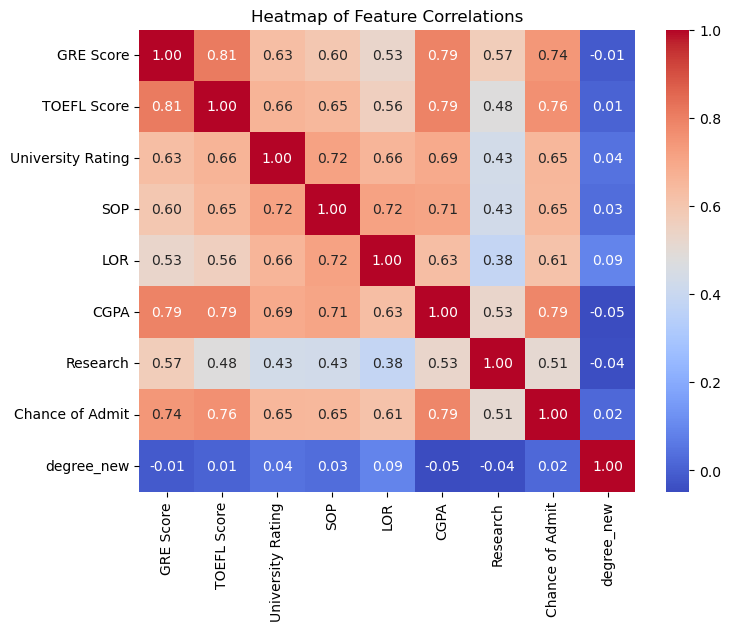

In [112]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()

In [113]:

correlation_matrix = df.corr()

print(correlation_matrix)


                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.811079           0.630510  0.597172   
TOEFL Score         0.811079     1.000000           0.662987  0.651551   
University Rating   0.630510     0.662987           1.000000  0.715230   
SOP                 0.597172     0.651551           0.715230  1.000000   
LOR                 0.527415     0.557786           0.657313  0.716924   
CGPA                0.793171     0.791824           0.692038  0.706251   
Research            0.573434     0.478864           0.432298  0.430192   
Chance of Admit     0.742333     0.759142           0.653843  0.650753   
degree_new         -0.014127     0.005032           0.044549  0.031194   

                        LOR      CGPA  Research  Chance of Admit  degree_new  
GRE Score          0.527415  0.793171  0.573434         0.742333   -0.014127  
TOEFL Score        0.557786  0.791824  0.478864         0.759142    0.005032  
University Rating  0.6

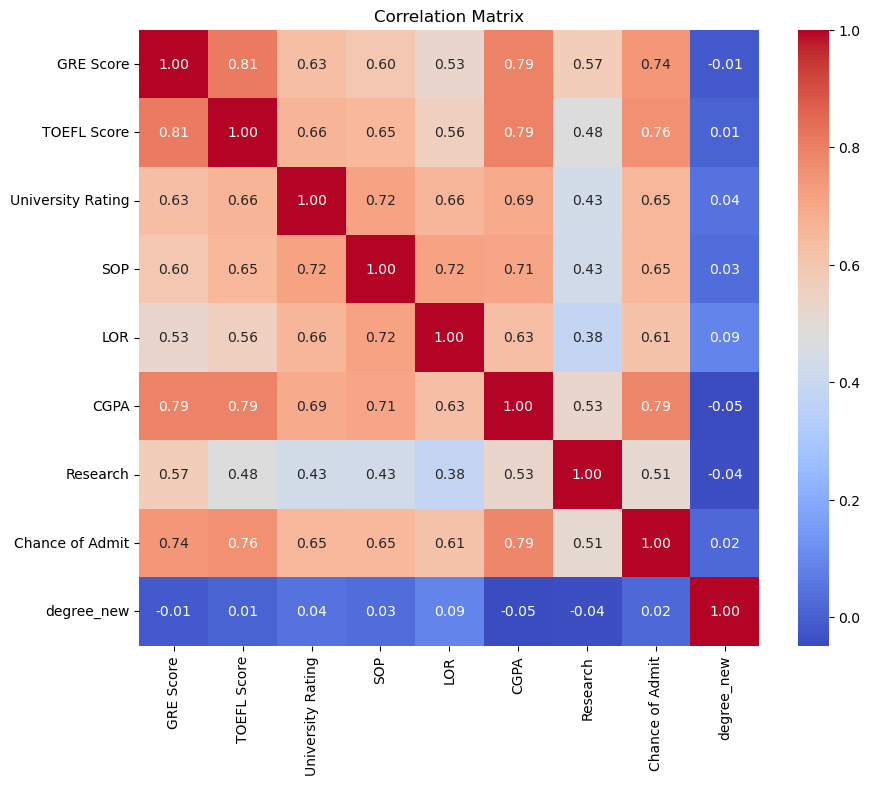

In [114]:

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [117]:
features = [col for col in df.columns if col != 'Chance of Admit']  # Exclude target column
X = df[features]
y = df['Chance of Admit']
# Display shapes
print("Features data:", X.shape)
print("Target:",y.shape)

Features data: (400, 8)
Target: (400,)


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
print(f"Training data shape (features): {X_train.shape}")
print(f"Testing data shape (features): {X_test.shape}")
print(f"Training data shape (target): {y_train.shape}")
print(f"Testing data shape (target): {y_test.shape}")

Training data shape (features): (320, 8)
Testing data shape (features): (80, 8)
Training data shape (target): (320,)
Testing data shape (target): (80,)


In [120]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [121]:
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
 print(f"{feature}: {coef:.4f}")
# R² Score
r2 = model.score(X_test, y_test)
print("R-Squared:",r2)

Intercept: -1.119826569327092
Coefficients:
GRE Score: 0.0019
TOEFL Score: 0.0049
University Rating: 0.0065
SOP: 0.0102
LOR: 0.0147
CGPA: 0.0710
Research: 0.0142
degree_new: -0.0015
R-Squared: 0.6347201274067109


Mean Squared Error: 0.007308967941702578
Root Mean Squared Error: 0.08549250225430637


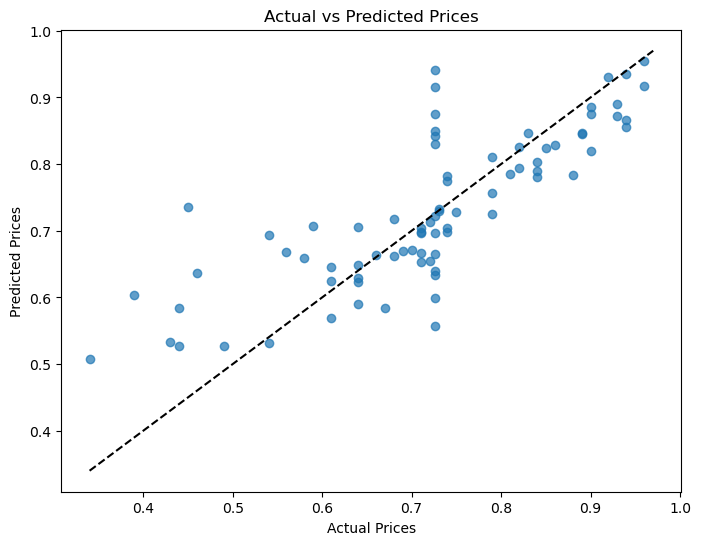

In [122]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.show()